# Analysis of results

Packages

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

BASE_DIR = Path(os.path.abspath(''))
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## Functions

In [2]:
def get_sensitivities(results_dicts):
    sensitivities = []
    for results in results_dicts:
        ab_stats = results['val_ab_stats']
        sensitivities.append(ab_stats['num_correct_R'].sum() / ab_stats['num_masked_R'].sum())
    return sensitivities

def get_specificities(results_dicts):
    specificities = []
    for results in results_dicts:
        ab_stats = results['val_ab_stats']
        specificities.append(ab_stats['num_correct_S'].sum() / ab_stats['num_masked_S'].sum())
    return specificities

def get_F1_scores(results_dicts):
    F1_scores = []
    for results in results_dicts:
        ab_stats = results['val_ab_stats']
        sensitivity = ab_stats['num_correct_R'].sum() / ab_stats['num_masked_R'].sum()
        precision = ab_stats['num_correct_R'].sum() / ab_stats['num_pred_R'].sum()
        F1_scores.append(2 * sensitivity * precision / (sensitivity + precision))
    return F1_scores

## Masking by *k* known antibiotics, *k* = 1 (60% genotypes masked)

In [3]:
results_easyPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_easyPT_mask_0.6_1known', 'results.pkl'))
results_mediumPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_mediumPT_mask_0.6_1known', 'results.pkl'))
results_hardPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_hardPT_mask_0.6_1known', 'results.pkl'))
results_naive = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_0.6_1known', 'results.pkl'))

In [4]:
results_easyPT.keys()

dict_keys(['train_time', 'best_epoch', 'train_losses', 'val_losses', 'val_accs', 'val_iso_accs', 'val_iso_stats', 'val_ab_stats'])

### General results

Compare loss, as well as top-level averages of accuracy, isolate accuracy, sensitivity, F1 etc. at best epoch

In [5]:
best_epoch = results_easyPT['best_epoch']
train_loss = results_easyPT['train_losses'][best_epoch]
val_loss = results_easyPT['val_losses'][best_epoch]
val_acc = results_easyPT['val_accs'][best_epoch]
val_iso_acc = results_easyPT['val_iso_accs'][best_epoch]
print(f'Best epoch: {best_epoch}')
print(f'Train loss: {train_loss:.3f}')
print(f'Val loss: {val_loss:.3f}')
print(f'Val accuracy: {val_acc:.3f}')
print(f'Val iso accuracy: {val_iso_acc:.3f}')
print(results_easyPT['val_losses'])

Best epoch: 23
Train loss: 0.153
Val loss: 0.154
Val accuracy: 0.942
Val iso accuracy: 0.773
[0.23272314166078473, 0.20806975411896658, 0.1918047347871384, 0.18216588237498066, 0.17751161178739944, 0.18305128871804416, 0.17335544246258122, 0.16831647287500967, 0.1617906400472811, 0.16890410621567528, 0.16358632380419438, 0.15757295400789467, 0.1652982541830233, 0.1625030253193166, 0.15997159599077584, 0.15649407452876024, 0.1586174162307588, 0.1567924423973159, 0.15812161889406715, 0.1565442699016911, 0.15713688878729792, 0.15605886855928025, 0.15502251728926555, 0.1538554370993435, 0.1548403843794719, 0.15549355686301053, 0.1545982549686243, 0.1586740512659054, 0.15798977578040396, 0.15938024237604426, 0.1596476111081567, 0.15595577730990873, 0.15431252092418105, 0.15482128256618385]


### Antibiotic-level results

## Random masking - 60% geno, 80% pheno

### General results

Compare loss, as well as top-level averages of accuracy, isolate accuracy, sensitivity, F1 etc. at best epoch

In [6]:
results_easyPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_easyPT_mask_probs_0.6_0.8', 'results.pkl'))
results_mediumPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_mediumPT_mask_probs_0.6_0.8', 'results.pkl'))
results_hardPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_hardPT_mask_probs_0.6_0.8', 'results.pkl'))
results_naive = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_probs_0.6_0.8', 'results.pkl'))

In [7]:
best_epoch = results_easyPT['best_epoch']
train_loss = results_easyPT['train_losses'][best_epoch]
val_loss = results_easyPT['val_losses'][best_epoch]
val_acc = results_easyPT['val_accs'][best_epoch]
val_iso_acc = results_easyPT['val_iso_accs'][best_epoch]
print(f'Best epoch: {best_epoch}')
print(f'Train loss: {train_loss:.3f}')
print(f'Val loss: {val_loss:.3f}')
print(f'Val accuracy: {val_acc:.3f}')
print(f'Val iso accuracy: {val_iso_acc:.3f}')
print(results_easyPT['val_losses'])

Best epoch: 19
Train loss: 0.158
Val loss: 0.159
Val accuracy: 0.938
Val iso accuracy: 0.775
[tensor(0.2324, device='cuda:0'), tensor(0.2042, device='cuda:0'), tensor(0.2056, device='cuda:0'), tensor(0.1910, device='cuda:0'), tensor(0.1876, device='cuda:0'), tensor(0.1808, device='cuda:0'), tensor(0.1780, device='cuda:0'), tensor(0.1779, device='cuda:0'), tensor(0.1716, device='cuda:0'), tensor(0.1738, device='cuda:0'), tensor(0.1708, device='cuda:0'), tensor(0.1646, device='cuda:0'), tensor(0.1712, device='cuda:0'), tensor(0.1662, device='cuda:0'), tensor(0.1736, device='cuda:0'), tensor(0.1661, device='cuda:0'), tensor(0.1680, device='cuda:0'), tensor(0.1642, device='cuda:0'), tensor(0.1701, device='cuda:0'), tensor(0.1592, device='cuda:0'), tensor(0.1641, device='cuda:0'), tensor(0.1696, device='cuda:0'), tensor(0.1652, device='cuda:0'), tensor(0.1662, device='cuda:0'), tensor(0.1683, device='cuda:0'), tensor(0.1673, device='cuda:0'), tensor(0.1686, device='cuda:0'), tensor(0.1663, 

In [8]:
iso_stats = results_easyPT['val_iso_stats']
iso_stats.head()

,year,country,num_ab,num_genotypes,num_point_mutations,ab_classes,num_masked,num_masked_S,num_masked_R,num_correct,correct_S,correct_R,sensitivity,specificity,accuracy,all_correct
0,2019,USA,5.0,5,2,"[4, 2, 3, 0, 3]",4,3,1,4,3,1,1.0,1.0,1.000000,True
1,2020,USA,8.0,4,2,"[4, 2, 2, 2, 3, 0, 3, 0]",6,6,0,6,6,0,NaN,1.0,1.000000,True
2,2021,Netherlands,7.0,3,0,"[4, 2, 2, 2, 3, 0, 3]",7,3,4,7,3,4,1.0,1.0,1.000000,True
3,2021,Netherlands,7.0,9,1,"[4, 2, 2, 2, 3, 0, 3]",5,1,4,5,1,4,1.0,1.0,1.000000,True
4,[PAD],[PAD],7.0,2,1,"[4, 2, 2, 2, 2, 0, 0]",7,6,1,6,6,0,0.0,1.0,0.857143,False


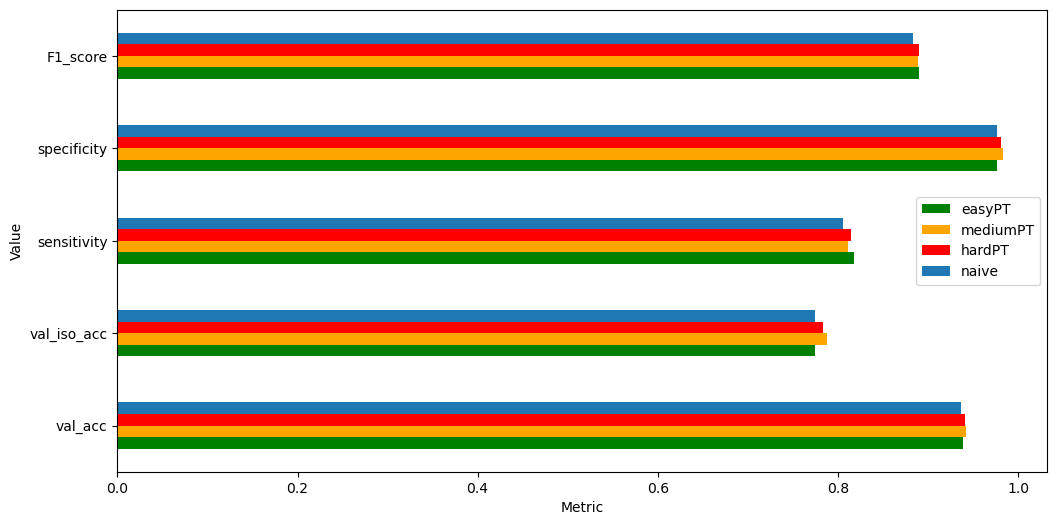

In [33]:
results_dicts = [results_easyPT, results_mediumPT, results_hardPT, results_naive]
best_epochs = [results['best_epoch'] for results in results_dicts]
model_names = ['easyPT', 'mediumPT', 'hardPT', 'naive']
df = pd.DataFrame(columns=['metric'] + model_names)
val_losses = [results['val_losses'][best_epoch].item() for results, best_epoch in zip(results_dicts, best_epochs)]
val_accs = [results['val_accs'][best_epoch] for results, best_epoch in zip(results_dicts, best_epochs)]
val_iso_accs = [results['val_iso_accs'][best_epoch] for results, best_epoch in zip(results_dicts, best_epochs)]
sensitivities = get_sensitivities(results_dicts)
specificities = get_specificities(results_dicts)
F1_scores = get_F1_scores(results_dicts)
# df.loc[0] = ['val_loss'] + val_losses
df.loc[1] = ['val_acc'] + val_accs
df.loc[2] = ['val_iso_acc'] + val_iso_accs
df.loc[3] = ['sensitivity'] + sensitivities
df.loc[4] = ['specificity'] + specificities
df.loc[5] = ['F1_score'] + F1_scores
df = df.set_index('metric')
df.plot.barh(rot=0, figsize=(12, 6), color=['green', 'orange', 'red', 'tab:blue'])
plt.legend(loc='center right')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

### Antibiotic-level

In [15]:
ab_stats = results_easyPT['val_ab_stats']
ab_stats
# ab_stats[(ab_stats['num_S'] > 2) & (ab_stats['num_R'] > 2)]

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
0,AMC,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,AMP,1231,651,580,742,489,1082,622,460,0.878960,0.793103,0.955453,0.940695,0.860617
2,AMX,6,0,6,0,6,6,0,6,1.000000,1.000000,NaN,1.000000,1.000000
3,CAZ,664,459,205,473,191,608,438,170,0.915663,0.829268,0.954248,0.890052,0.858586
4,CIP,1238,1003,235,1021,217,1186,986,200,0.957997,0.851064,0.983051,0.921659,0.884956
5,CRO,1130,929,201,940,190,1087,913,174,0.961947,0.865672,0.982777,0.915789,0.890026
6,CTX,174,22,152,19,155,165,16,149,0.948276,0.980263,0.727273,0.961290,0.970684
7,FEP,641,520,121,533,108,600,506,94,0.936037,0.776860,0.973077,0.870370,0.820961
8,GEN,1228,1076,152,1100,128,1150,1049,101,0.936482,0.664474,0.974907,0.789062,0.721429
9,LVX,551,391,160,403,148,527,385,142,0.956443,0.887500,0.984655,0.959459,0.922078


Generate plot where each antibiotic has bars for a metric from all models and the S-R imbalance -> one bar chart for each metric

#### Accuracy

Pre-trained model

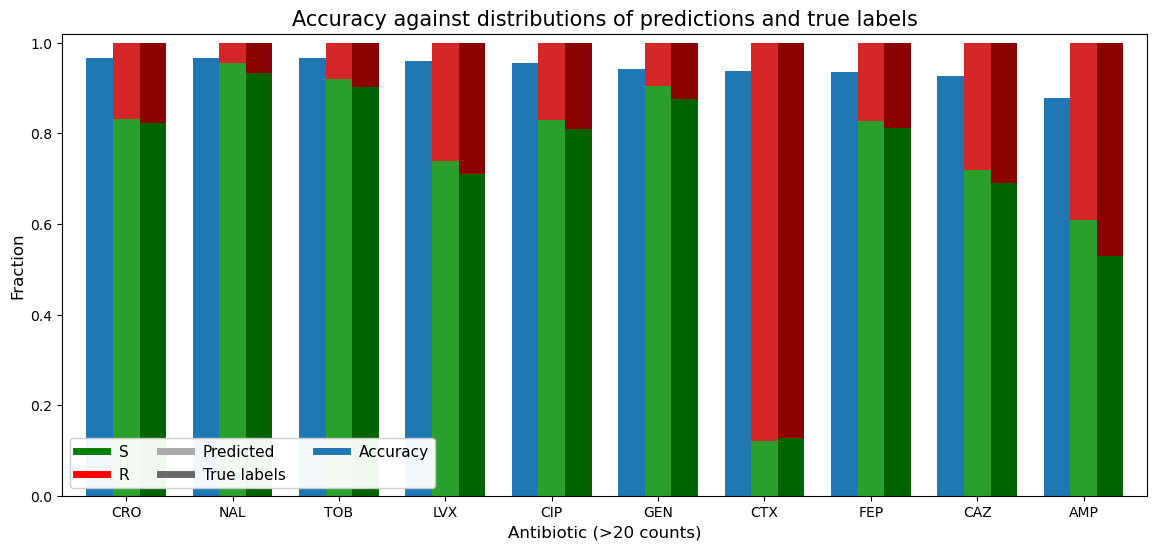

In [71]:
ab_stats = results_hardPT['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Naive model

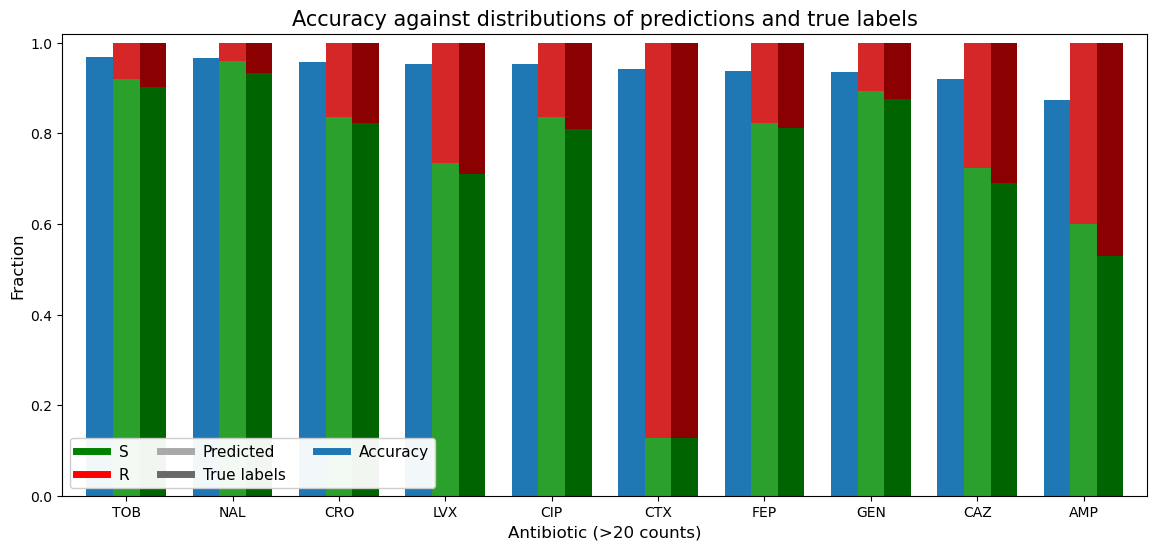

In [72]:
ab_stats = results_naive['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Compare naive and pre-trained

C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\2087704553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\2087704553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\2087704553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

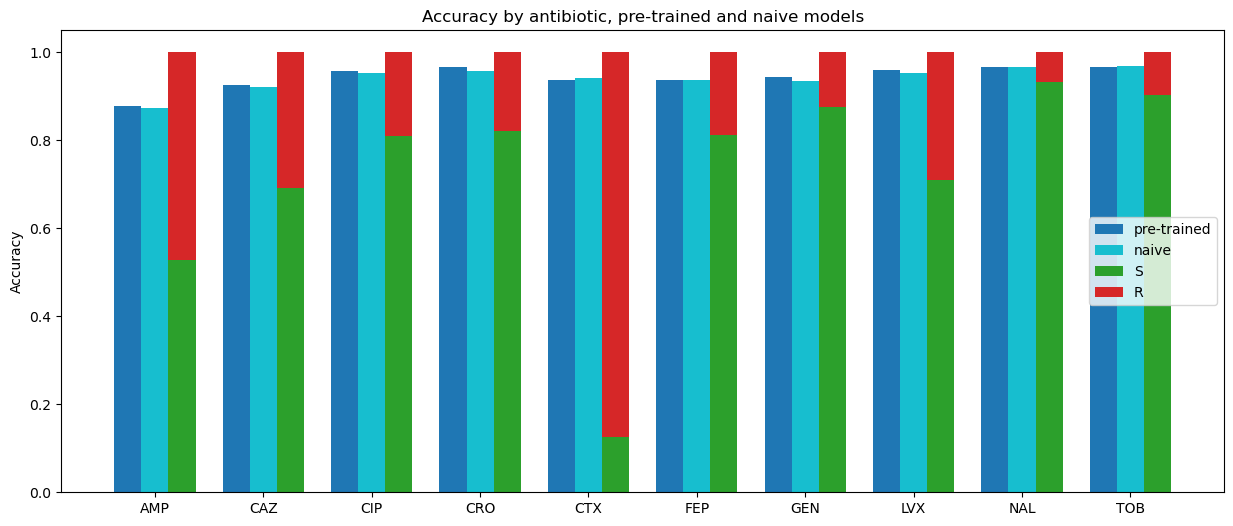

In [73]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['accuracy'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['accuracy'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Accuracy by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

Compare for sensitivity, specificity and F1

C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\3348240359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\3348240359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\3348240359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

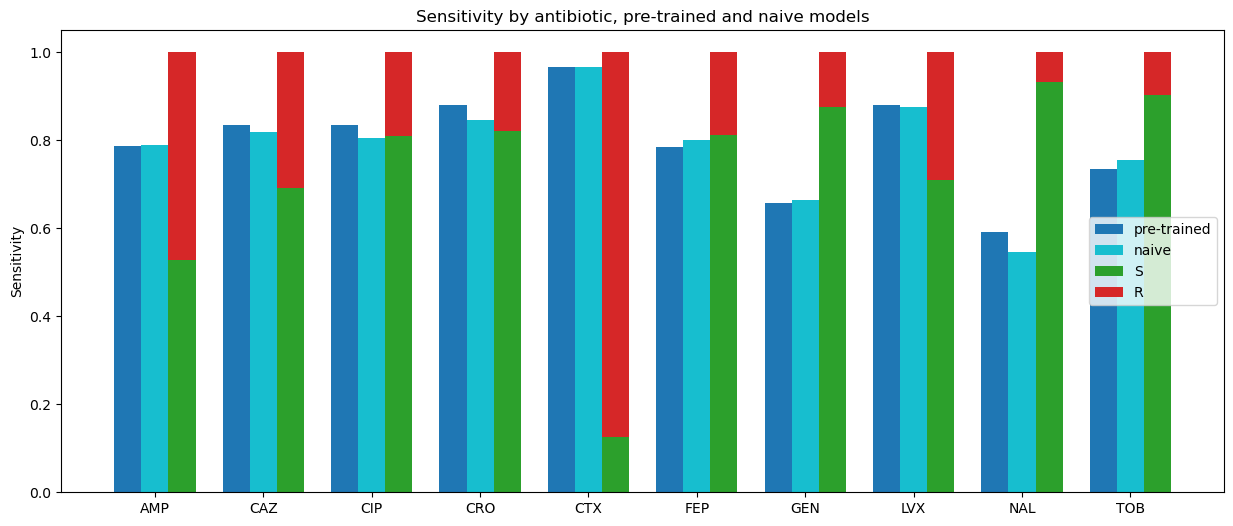

In [74]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['sensitivity'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['sensitivity'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Sensitivity by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Sensitivity')
plt.legend(loc='center right')
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\2259624284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\2259624284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\2259624284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

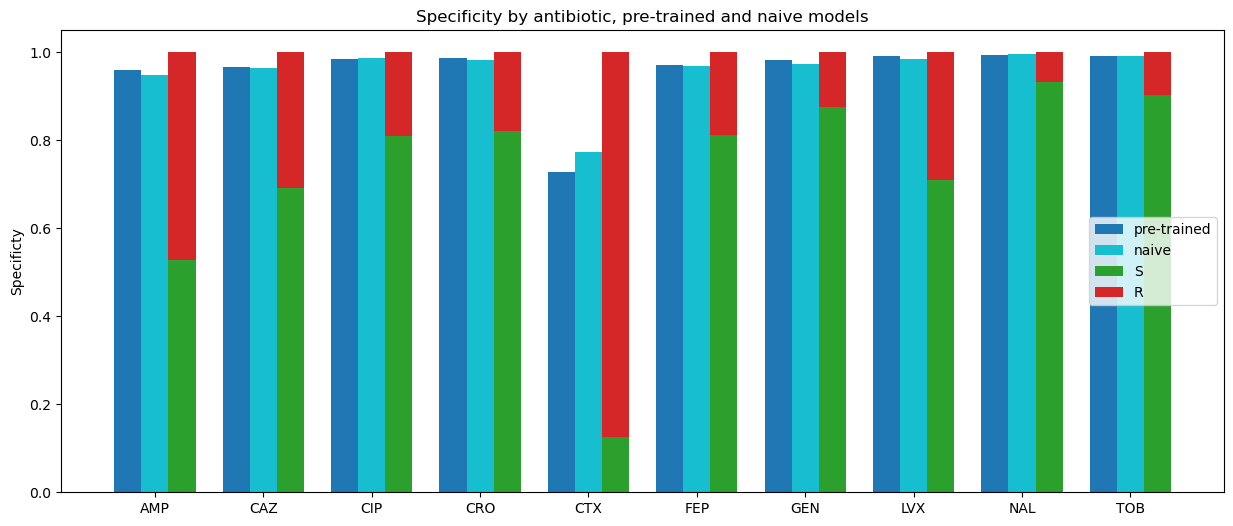

In [75]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['specificity'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['specificity'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Specificity by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Specificty')
plt.legend(loc='center right')
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\1147329750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\1147329750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_6876\1147329750.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

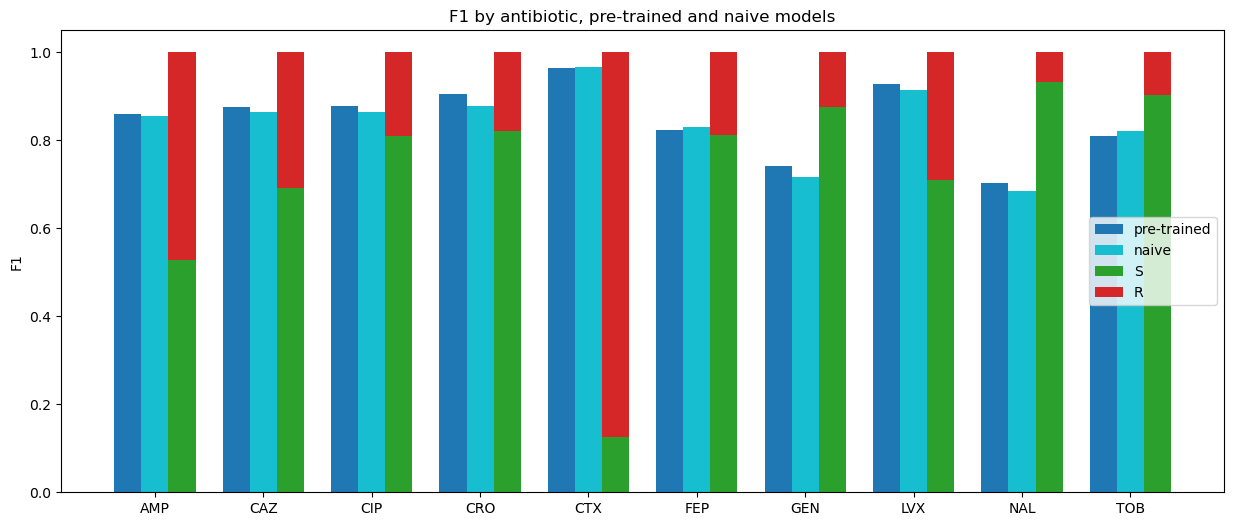

In [76]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['F1'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['F1'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('F1 by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('F1')
plt.legend(loc='center right')
plt.show()

## Masking by class

**Q:** Why is the task so easy?

In [15]:
results_dict = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_0.5_class_test', 'results.pkl'))
results_dict_1known = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_0.5_1known_test', 'results.pkl'))

In [16]:
iso_stats = results_dict['val_iso_stats']
ab_stats = results_dict['val_ab_stats']
iso_stats_1known = results_dict_1known['val_iso_stats']
ab_stats_1known = results_dict_1known['val_ab_stats']

In [17]:
iso_stats['frac_masked'] = iso_stats['num_masked'] / iso_stats['num_ab']
iso_stats_1known['frac_masked'] = iso_stats_1known['num_masked'] / iso_stats_1known['num_ab']

In [35]:
ab_stats.head()

,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1,S_frac,R_frac
antibiotic,,,,,,,,,,,,,,,
NAL,690,648,42,664,26,670,646,24,0.971014,0.571429,0.996914,0.923077,0.705882,0.939130,0.060870
TOB,516,468,48,469,47,503,462,41,0.974806,0.854167,0.987179,0.872340,0.863158,0.906977,0.093023
GEN,1124,991,133,1022,102,1049,969,80,0.933274,0.601504,0.977800,0.784314,0.680851,0.881673,0.118327
CIP,1254,1012,242,1037,217,1195,995,200,0.952951,0.826446,0.983202,0.921659,0.871460,0.807018,0.192982
CRO,1101,876,225,882,219,1053,855,198,0.956403,0.880000,0.976027,0.904110,0.891892,0.795640,0.204360


In [18]:
iso_stats['frac_masked'].describe()

count    1532.000000
mean        0.777354
std         0.087165
min         0.500000
25%         0.750000
50%         0.800000
75%         0.857143
max         0.888889
Name: frac_masked, dtype: float64

In [19]:
iso_stats_1known['frac_masked'].describe()

count    1586.000000
mean        0.827627
std         0.065229
min         0.500000
25%         0.800000
50%         0.857143
75%         0.875000
max         0.888889
Name: frac_masked, dtype: float64

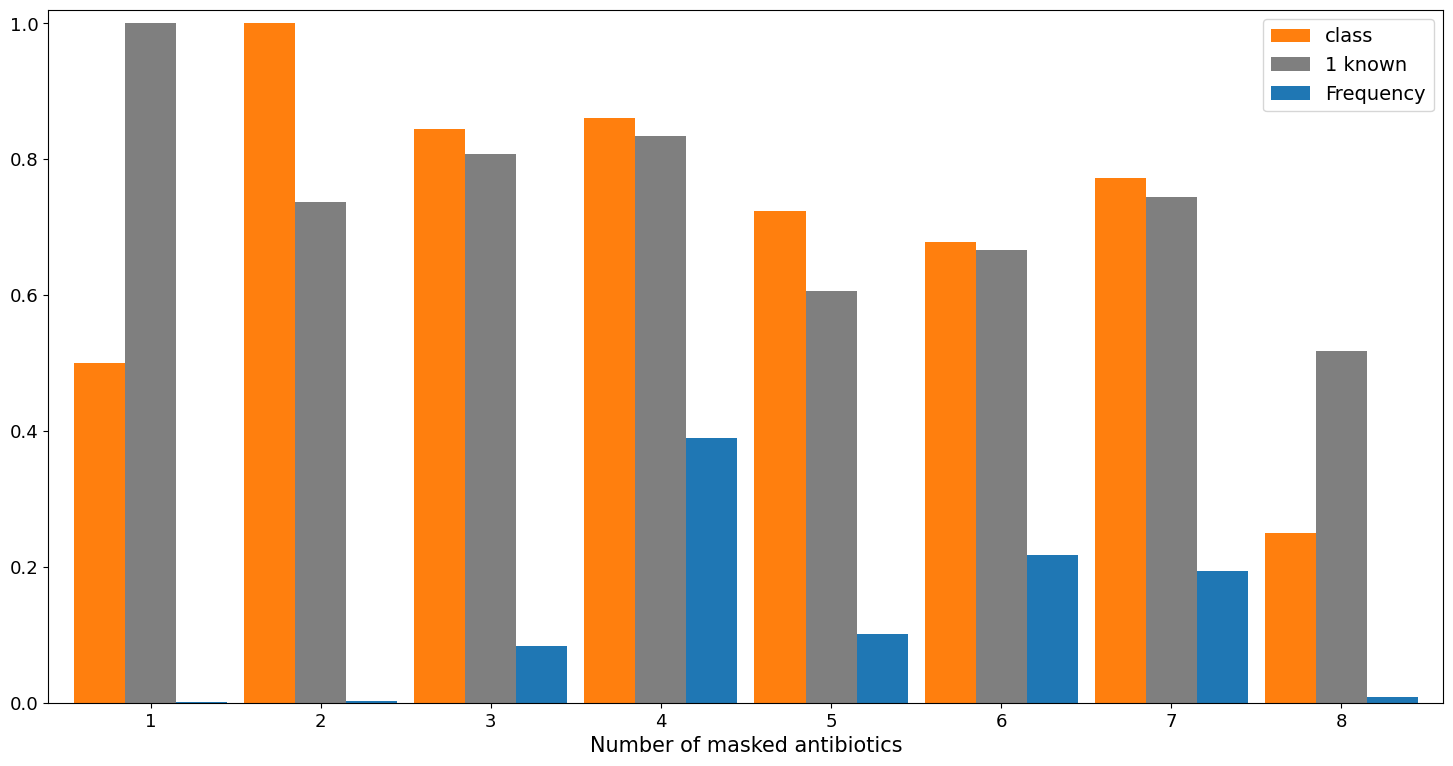

In [20]:
df_tmp = iso_stats.groupby('num_masked').agg({'all_correct': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp_1known = iso_stats_1known.groupby('num_masked').agg({'all_correct': ['mean', 'count']})
df_tmp_1known.columns = ['accuracy', 'count']
# df_tmp = df_tmp[df_tmp['count'] > 10]
# df_tmp_1known = df_tmp_1known[df_tmp_1known['count'] > 10]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp_1known['share'] = df_tmp_1known['count'] / df_tmp_1known['count'].sum()

fig, ax = plt.subplots(figsize=(18, 9))
ind = np.arange(df_tmp.shape[0])
bar_width = 0.3
bar1 = ax.bar(ind - bar_width, df_tmp['accuracy'], width=bar_width, color='tab:orange', label='class')
bar2 = ax.bar(ind, df_tmp_1known['accuracy'], width=bar_width, color='tab:gray', label='1 known')
bar3 = ax.bar(ind + bar_width, df_tmp['share'], width=bar_width, color='tab:blue', label='Frequency')
# bar3 = ax.bar(ind + bar_width, df_tmp_1known['share'], width=bar_width, color='tab:blue', label='Frequency')
# ax.bar_label(bar1, fmt='%.3f', padding=1, fontsize=10)
# ax.bar_label(bar2, fmt='%.3f', padding=1, fontsize=10)

ax.set_xlabel('Number of masked antibiotics', fontsize=15)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.set_xticks(ind)
ax.set_xticklabels(df_tmp.index, fontsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper right', fontsize=14)
plt.savefig(os.path.join(BASE_DIR, 'results', 'halftime_figs', 'iso_accs_vs_num_masked.png'), bbox_inches='tight', dpi=300, transparent=True)
plt.show()

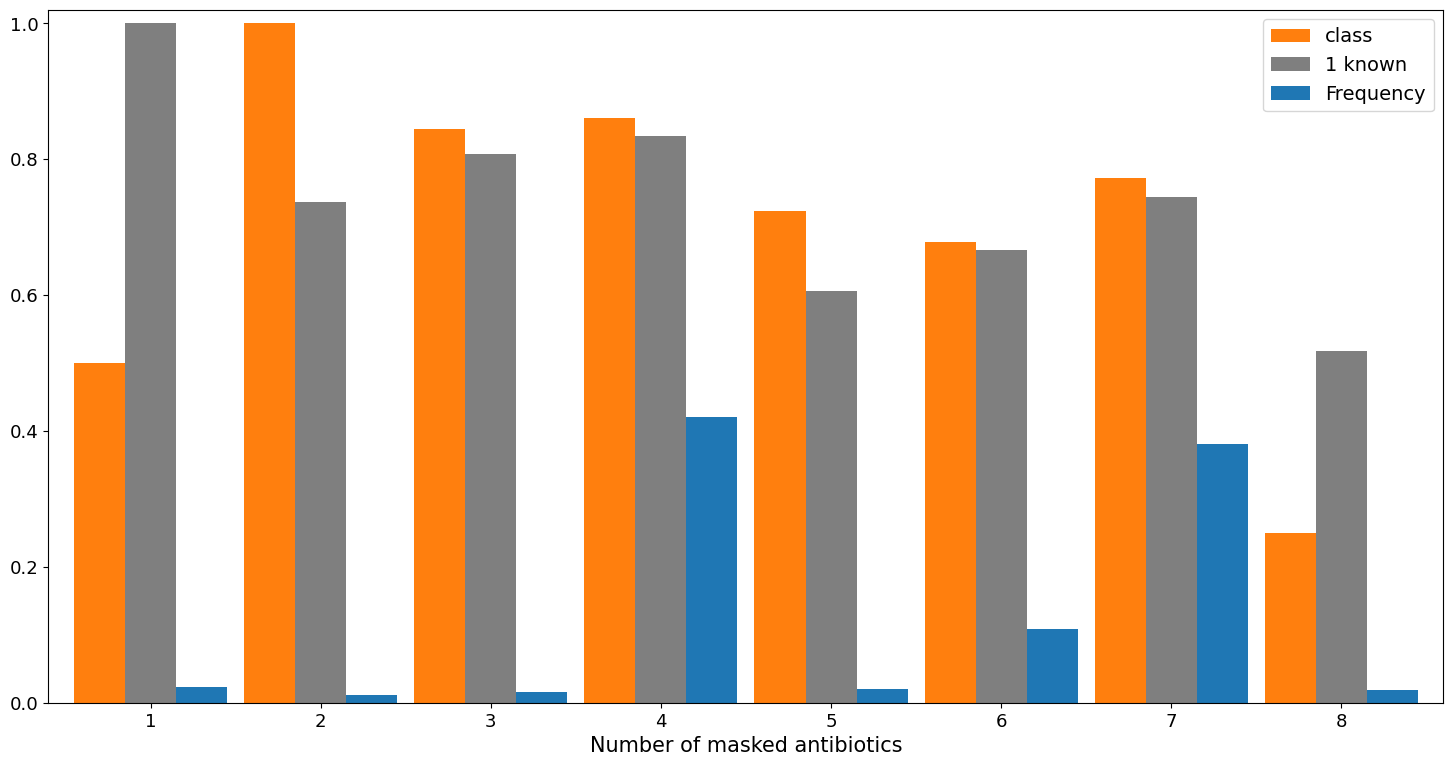

In [21]:
df_tmp = iso_stats.groupby('num_masked').agg({'all_correct': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp_1known = iso_stats_1known.groupby('num_masked').agg({'all_correct': ['mean', 'count']})
df_tmp_1known.columns = ['accuracy', 'count']
# df_tmp = df_tmp[df_tmp['count'] > 10]
# df_tmp_1known = df_tmp_1known[df_tmp_1known['count'] > 10]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp_1known['share'] = df_tmp_1known['count'] / df_tmp_1known['count'].sum()

fig, ax = plt.subplots(figsize=(18, 9))
ind = np.arange(df_tmp.shape[0])
bar_width = 0.3
bar1 = ax.bar(ind - bar_width, df_tmp['accuracy'], width=bar_width, color='tab:orange', label='class')
bar2 = ax.bar(ind, df_tmp_1known['accuracy'], width=bar_width, color='tab:gray', label='1 known')
# bar3 = ax.bar(ind + bar_width, df_tmp['share'], width=bar_width, color='tab:blue', label='Frequency')
bar3 = ax.bar(ind + bar_width, df_tmp_1known['share'], width=bar_width, color='tab:blue', label='Frequency')
# ax.bar_label(bar1, fmt='%.3f', padding=1, fontsize=10)
# ax.bar_label(bar2, fmt='%.3f', padding=1, fontsize=10)

ax.set_xlabel('Number of masked antibiotics', fontsize=15)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.set_xticks(ind)
ax.set_xticklabels(df_tmp.index, fontsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper right', fontsize=14)
plt.savefig(os.path.join(BASE_DIR, 'results', 'halftime_figs', 'iso_accs_vs_num_masked.png'), bbox_inches='tight', dpi=300, transparent=True)
plt.show()

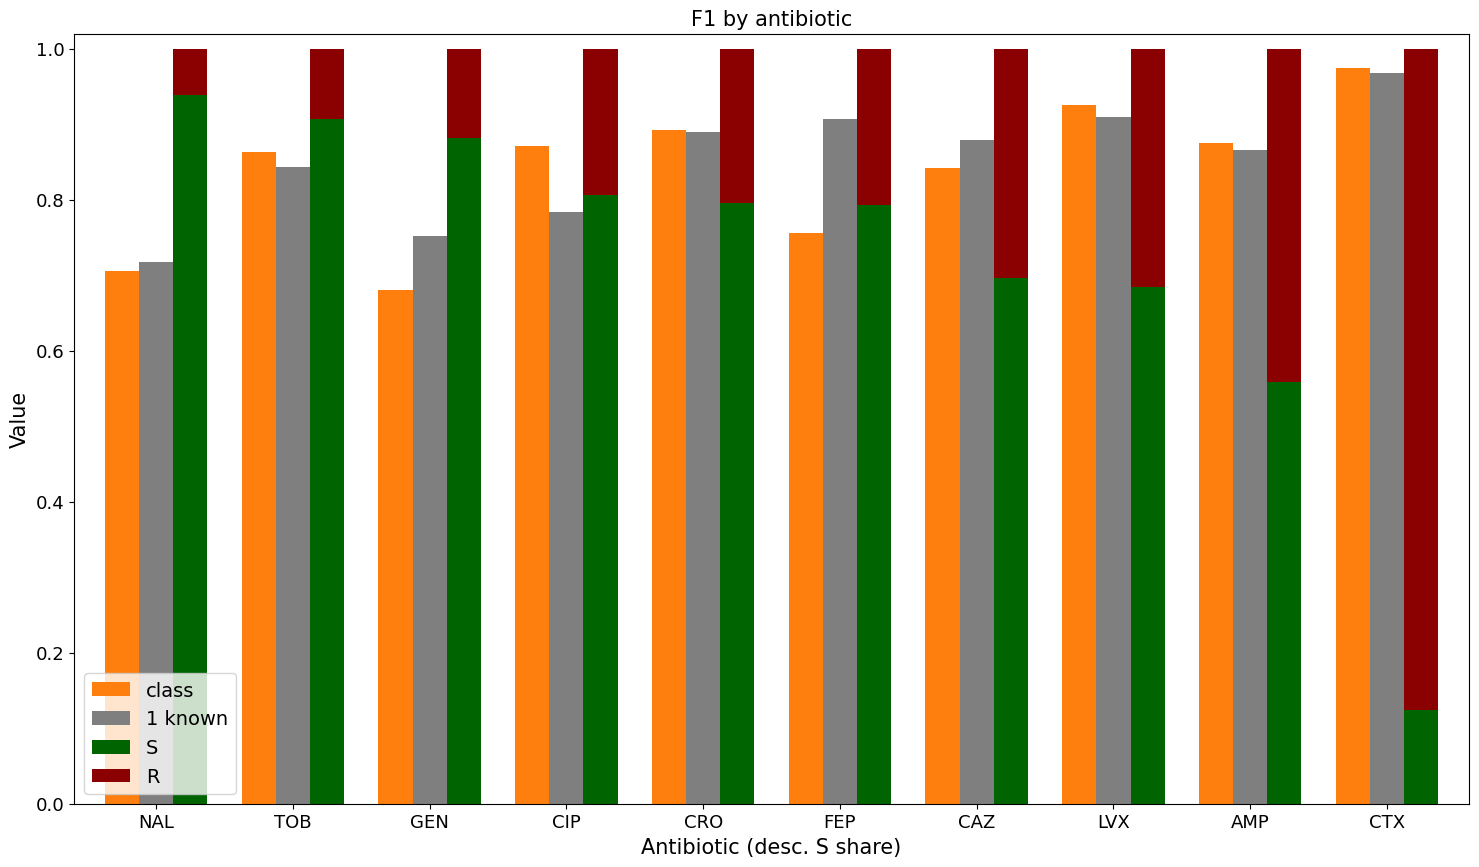

In [33]:
ab_stats['S_frac'] = ab_stats['num_S'] / ab_stats['num_tot']
ab_stats['R_frac'] = ab_stats['num_R'] / ab_stats['num_tot']
frac_R, frac_S = ab_stats['R_frac'], ab_stats['S_frac']
ab_stats_1known['S_frac'] = ab_stats_1known['num_S'] / ab_stats_1known['num_tot']
ab_stats_1known['R_frac'] = ab_stats_1known['num_R'] / ab_stats_1known['num_tot']
ab_stats.sort_values(by='S_frac', ascending=False, inplace=True)
ab_stats_1known.sort_values(by='S_frac', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(18, 10))
ind = np.arange(len(ab_stats))
bar_width = 0.25
bar1 = ax.bar(ind - bar_width, ab_stats['F1'], width=bar_width, color='tab:orange', label='class')
bar3 = ax.bar(ind, ab_stats_1known['F1'], width=bar_width, color='tab:gray', label='1 known')
bar5_1 = ax.bar(ind + bar_width, frac_S, width=bar_width, color='darkgreen', label='S')
bar5_2 = ax.bar(ind + bar_width, frac_R, bottom=frac_S, width=bar_width, color='darkred', label='R')

ax.set_xlabel('Antibiotic (desc. S share)', fontsize=15)
ax.set_ylabel('Value', fontsize=15)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, ab_stats.index)
ax.set_xticklabels(ab_stats.index, fontsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlim(-0.6, len(ab_stats) - 0.4)
ax.legend(loc='lower left', fontsize=14)
ax.set_title('F1 by antibiotic', fontsize=15)
plt.savefig(os.path.join(BASE_DIR, 'results', 'halftime_figs', 'F1_vs_ab.png'), bbox_inches='tight', dpi=300, transparent=True)
plt.show()